In [1]:
print('Good to go')

Good to go


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from PIL import Image
import cv2

In [4]:
from random import shuffle
import os
print(os.listdir("../images/images"))

import warnings
warnings.filterwarnings('ignore')

['test', 'train', 'val']


In [5]:
train_messy = "../images/images/train/messy"
train_clean= "../images/images/train/clean"

image_size = 128

In [6]:
# Image.open(train_clean + "/0.png")

In [7]:
# Image.open(train_messy + "/0.png")

In [8]:
img = cv2.imread(train_messy + "/0.png", cv2.IMREAD_GRAYSCALE)
img.shape

(299, 299)

In [9]:
img = cv2.resize(img, (image_size, image_size))
img.shape

(128, 128)

In [10]:
# plt.imshow(img, 'gray')

In [11]:
def train_data():
    train_data_messy = [] 
    train_data_clean=[]
    for image in os.listdir(train_messy):
        path = os.path.join(train_messy, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_messy.append(img1) 
    for image in os.listdir(train_clean): 
        path = os.path.join(train_clean, image)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)),axis=0)
    return train_data 

In [12]:
train_data = train_data() 

In [13]:
train_data.shape

(192, 128, 128)

In [14]:
train_data[0]

array([[203, 202, 196, ...,   1,   0,   0],
       [203, 202, 204, ...,   0,   0,   0],
       [213, 215, 219, ...,   0,   1,   0],
       ...,
       [134, 138, 139, ..., 124, 109, 118],
       [135, 122, 127, ..., 111, 112, 111],
       [140, 159, 157, ..., 118, 106,  46]], dtype=uint8)

# Normalization

In [15]:
x_data = (train_data-np.min(train_data))/(np.max(train_data)-np.min(train_data))
# x_data = train_data/255

In [16]:
x_data[0].shape

(128, 128)

In [17]:
# x_data[0]

In [18]:
z1 = np.zeros(96)
o1 = np.ones(96)
y = np.concatenate((o1, z1), axis=0)

In [19]:
# y

In [20]:
print("X shape: " , x_data.shape)
print("Y shape: " , y.shape)

X shape:  (192, 128, 128)
Y shape:  (192,)


# Train Test split for checking the performance of model

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.15, random_state=23)

number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [22]:
# print("X train: " , x_train.shape)
# print("Y train: " , y_train.shape)

In [23]:
# df = pd.DataFrame(y_train)
# df[0].value_counts()

In [24]:
x_train.shape

(163, 128, 128)

In [25]:
x_train[0].shape

(128, 128)

# Flattening the image

In [26]:
x_train = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train.shape)
print("X test flatten",x_test.shape)

X train flatten (163, 16384)
X test flatten (29, 16384)


In [27]:
# 128*128*3

In [28]:
df_x = pd.DataFrame(x_train)
# df_x

# Model Building

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(random_state=23)
model.fit(x_train, y_train)

train_pred = model.predict(x_train)
print(accuracy_score(train_pred, y_train))

test_pred = model.predict(x_test)
print(accuracy_score(test_pred, y_test))

0.6551724137931034


# Testing with new image

In [31]:
new_img = cv2.imread('../images/images/test/2.png', cv2.IMREAD_GRAYSCALE)
# plt.imshow(new_img, cmap='gray')

In [32]:
test_img = cv2.resize(new_img, (image_size, image_size))
test_img.shape

(128, 128)

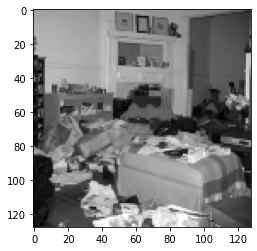

In [33]:
test_img = (test_img-np.min(train_data))/(np.max(train_data)-np.min(train_data))
# test_img = test_img/255
plt.imshow(test_img, cmap='gray')

In [34]:
test = test_img.reshape(1,128*128)

In [35]:
model.predict(test)

array([1.])

# Performance of model with unseen images

In [41]:
def preprocess(img_index):
    new_img = cv2.imread('../images/images/val/messy/'+str(img_index)+'.png', cv2.IMREAD_GRAYSCALE)
    test_img = cv2.resize(new_img, (image_size, image_size))
    test_img = (test_img-np.min(train_data))/(np.max(train_data)-np.min(train_data))
    test = test_img.reshape(1,128*128)
#     plt.imshow(new_img, 'gray')
    return test

for i in range(10):
    img = preprocess(i)
    pred = model.predict(img)
    if pred == 0:
        print('Clean :)')
    else:
        print('Messy :(')

Messy :(
Messy :(
Clean :)
Messy :(
Clean :)
Messy :(
Clean :)
Messy :(
Clean :)
Messy :(


# Hyperparameter and parameter tuning using GridSearchCV

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}

logistic_regression=LogisticRegression(random_state=24)
log_reg_cv=GridSearchCV(logistic_regression,grid,cv=10)
log_reg_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=24),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [45]:
print("best hyperparameters: ", log_reg_cv.best_params_)
print("accuracy: ", log_reg_cv.best_score_)

best hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
accuracy:  0.6985294117647058


In [47]:
log_reg= LogisticRegression(C=0.001,penalty="l2")
log_reg.fit(x_train,y_train)

LogisticRegression(C=0.001)

In [49]:
train_pred = log_reg.predict(x_train)
print(accuracy_score(train_pred, y_train))

test_pred = log_reg.predict(x_test)
print(accuracy_score(test_pred, y_test))

0.8466257668711656
0.7586206896551724


# Logistic Regression From Scratch

In [37]:
# x_train = x_train_flatten.T
# x_test = x_test_flatten.T
# y_test = y_test.T
# y_train = y_train.T
# print("x train: ",x_train.shape)
# print("x test: ",x_test.shape)
# print("y train: ",y_train.shape)
# print("y test: ",y_test.shape)

In [38]:
# def initialize_weights_and_bias(dimension):
#     w = np.full((dimension,1),0.01)
#     b = 0.0
#     return w, b

# def sigmoid(z):
#     y_head = 1/(1+np.exp(-z))
#     return y_head

# def forward_backward_propagation(w,b,x_train,y_train):
#     # forward propagation
#     z = np.dot(w.T,x_train) + b
#     y_head = sigmoid(z)
#     loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
#     cost = (np.sum(loss))/x_train.shape[1]
#     # backward propagation
#     derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
#     derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
#     gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
#     return cost,gradients

# def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
#     cost_list = []
#     cost_list2 = []
#     index = []
    
#     for i in range(number_of_iterarion):
        
#         cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
#         cost_list.append(cost)
        
#         w = w - learning_rate * gradients["derivative_weight"]
#         b = b - learning_rate * gradients["derivative_bias"]
#         if i % 100 == 0:
#             cost_list2.append(cost)
#             index.append(i)
#             print ("Cost after iteration %i: %f" %(i, cost))
    
#     parameters = {"weight": w,"bias": b}
#     plt.plot(index,cost_list2)
#     plt.xticks(index,rotation='vertical')
#     plt.xlabel("Number of Iteration")
#     plt.ylabel("Cost")
#     plt.show()
#     return parameters, gradients, cost_list

# def predict(w,b,x_test):
    
#     z = sigmoid(np.dot(w.T,x_test)+b)
#     Y_prediction = np.zeros((1,x_test.shape[1]))

#     for i in range(z.shape[1]):
#         if z[0,i]<= 0.5:
#             Y_prediction[0,i] = 0
#         else:
#             Y_prediction[0,i] = 1

#     return Y_prediction

# def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

#     dimension =  x_train.shape[0]
#     w,b = initialize_weights_and_bias(dimension)

#     parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
#     y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
#     y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
#     print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
#     print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

In [39]:
# logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 1500)